# Data Analytics Spring 2023 &mdash; Exercises 5 sketch

### Onni Roivas (last modified: Mon Mar 13 at 16:00)

- (**Some new things here**)
- Five problems + round 4 peer review
- Round 4 peer review deadline: **Mon Mar 20 at 14:00**
- Problems deadline: **Mon Mar 27 at 14:00**
- Theme: time series
- Minor variations between users
- **Make a copy of the original notebook** (right click & duplicate) and add your answers (new cells) there
- There may be no autosave
- **Quit working by stopping the server [here](https://jupyter.vle.fi/home), then close your browser tabs**
- Instead of the lab environment (an enhanced notebook environment), the [plain notebook environment](https://jupyter.vle.fi/user/AB0410/tree) may be more efficient.
    - [lux](https://github.com/lux-org/lux) works only in the plain notebook environment
    - animations work better in the plain notebook environment
- Please make both your code and your notebook readable
- When you are done, run the handin code cell at the end of this notebook
- The original notebook may change after publication, but the
  changes should be minor
- Keep your originals up to date by running the code cell below:

In [1]:
import os
os.system('/usr/bin/bash /home/varpha/data_analytics/bin/config.sh');


Configuring...
Done.



## Round 4 peer review

**Deadline: Mon Mar 20 at 14:00**. Nothing new here!

In case you handed in your round 04 exercises, your folder **private/exrc_04/peer_review** should contain an anonymous round 04 solutions notebook of another student. In addition, some model solutions for round 04 are to be found in the folder **public/model_solutions**.

Write a few paragraphs of text (plain or markdown) into your favourite text editor and submit by running the code cell below. Please address the following issues:
 
- Are the solutions okay? Can you understand / run the code?<br/>
- What do you think about the solutions?
- How many points out of 5 do they deserve as a whole?
- How many points would you give to yourself and why?
- Any feedback or comments to Harri?

Harri will read and grade your reviews as follows:
- nonexistent or nearly so = 0p
- something written = 1-2p
- well written 3p.

When done with writing your review, please run the code cell below. It asks you to copy-paste your review text to a field that will become visible once you run the cell.


In [ ]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import submit_peer_review
submit_peer_review()

You may double check your review submission by running the following in the terminal (copy-paste & press enter):

> **cat /home/varpha/data_analytics/private/AB0410/exrc_04/peer_review/review_by_AB0410.txt**

## Problem 1. Shifting
The file

    public/data/exrc_05/windmill_temperatures.csv
  
contains a temperature timeseries measured from the top of a windmill at about 200 meters high.

The file

    public/data/exrc_05/fmi_temperatures.csv
    
contains the corresponding [fmi](en.ilmatieteenlaitos.fi) temperature timeseries measured from a nearby station at 2 meters high, and about 30km away from the windmill.

The windmill operator did not include any metadata, e.g. what is the timezone in the windmill data. Your task is to find out what is the difference (if any) in the timezones.

**Note: This is not an easy task, and there is not a best method (unless we agree having found one)!**

In [30]:
import pandas as pd

windmill_data = pd.read_csv('../../public/data/exrc_05/windmill_temperature.csv')
fmi_data = pd.read_csv('../../public/data/exrc_05/fmi_temperature.csv')

# convert windmill t column to datetime format
windmill_data['timestamp'] = pd.to_datetime(windmill_data['t'], format='%Y %m %d %H:%M:%S')

# concatenate date and time columns and convert to datetime format
fmi_data['Timestamp'] = pd.to_datetime(fmi_data['Year'].astype(str) + '-' + fmi_data['Month'].astype(str) + '-' + fmi_data['Day'].astype(str), format='%Y-%m-%d %H:%M')

# remove timezone information
#fmi_data['Timestamp'] = pd.to_datetime(fmi_data['Timestamp']).dt.tz_localize(None)

# merge both files on timestamp
merged_data = pd.merge(fmi_data[['Timestamp', 'Temperature(degC)']], windmill_data[['timestamp', 'T_NacOutAir.actual']], left_on='Timestamp', right_on='timestamp', how='inner')

# Not sure how to continue this one

## Problem 2. Worktimes
The file

    public/data/exrc_05/harri_worktimes.json
    
contains Harri's [taskwarrior](https://taskwarrior.org) test data from the week after the spring break (Sun Mar 5 - Fri Mar 10). "Test" because it's a first-time try and the task recordings contain some garbage as well (like accidentally recording a task called "3" for two seconds). You don't need to care about any other tags than the first one in the tag list of each task.

What has Harri worked on and how many hours? Please do this in the same spirit than the opening questionnaire thing in round 03... You just need to wrangle the timestamps (perhaps the timezone is 2h off throughout in these logs but that's minor, you don't need to care about that) and group by the tags. That's the minimum requirement for the point! Then something graphical or an "ydata-profiling" type thing would be nice too.

In [26]:
import json
from datetime import datetime

with open('../../public/data/exrc_05/harri_worktimes.json') as f:
    data = json.load(f)

# dictionary to store the total duration of each tag
tag_duration = {}

# loop over the tasks
for task in data:
    # get first tags
    tag = task['tags'][0]
    
    # convert start and end times to datetime objects
    start_time = iso8601_to_datetime(task['start'])
    end_time = iso8601_to_datetime(task['end'])
    
    # calculate the duration of the task in hours
    duration = (end_time - start_time).total_seconds() / 3600
    
    # add the duration to the total duration of a tag
    tag_duration[tag] = tag_duration.get(tag, 0) + duration

for tag, duration in tag_duration.items():
    print(f'{tag}: {duration:.2f} hours')

communication: 4.33 hours
math3 course initialization: 2.14 hours
dan weekend preparation: 5.34 hours
dan monday preparation: 1.72 hours
math2 vietnam exam: 3.53 hours
reportronic fix: 0.00 hours
daily planning: 0.31 hours
dan: 5.34 hours
dsa: tim-tutustuminen: 0.07 hours
10: 0.25 hours
math2 grading: 2.24 hours
3: 0.09 hours
dsa: teams-palaveri: 1.80 hours
ovm:lisatehtavan tarkistus: 0.49 hours
math3 teaching: 4.36 hours
dsa meeting: 0.94 hours
dsa coding: 0.50 hours
extra dsa communication: 0.17 hours
+ttv: 0.25 hours
dsa / tim: 0.69 hours
math3 planning: 0.61 hours
math3 support teaching: 0.06 hours


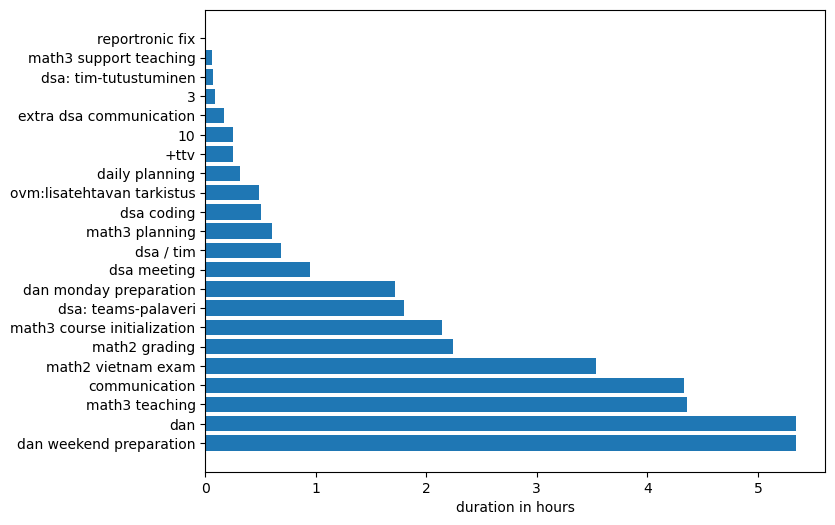

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# list of tags and durations
tags = list(tag_duration.keys())
durations = list(tag_duration.values())

# sort the tags and durations from lowest to highest hours
tags, durations = zip(*sorted(zip(tags, durations), key=lambda x: x[1], reverse=True))

# bar plot of the output
fig, ax = plt.subplots(figsize=(8, 6))
y_pos = np.arange(len(tags))
ax.barh(y_pos, durations, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(tags)
ax.set_xlabel('duration in hours')
plt.show()

## Problem 3. Sales

(Most of this problem was already done for you in the round 05 notes.)

The file

    private/exrc_05/data/AB0410_prob3_sales.csv

contains some (fake) daily sales data.

Please perform the following basic wranglings:

- convert the date column to a standard datetime type (there may be several ways to do that)
- index the dataframe by the date column
- in the round 05 notes we used the **rolling** function but **let's forget about that**
- using **resample** and **sum**, downsample the data from daily to a monthly frequency
- shift the resampled data by one month to reflect the previous month's sales (i.e. your last "monthly sales report" should happen at March 2023 and be about Feb 2023)
- plot a sales curve and calculate some descriptive statistics (feel free to do what you want here, doesn't need to be anything fancy).


count        13.000000
mean     164924.307692
std       10743.763116
min      151967.000000
25%      158350.000000
50%      165358.000000
75%      166283.000000
max      188710.000000


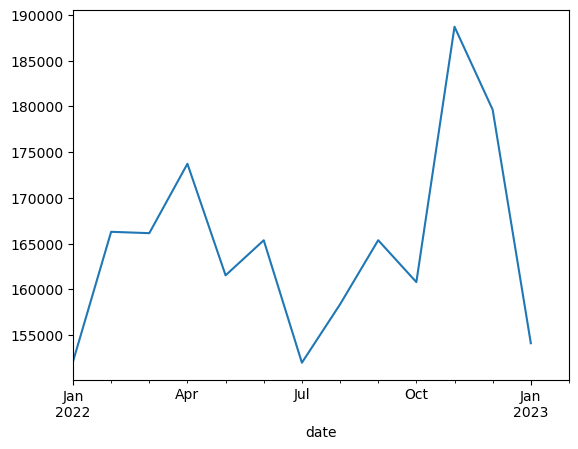

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/AB0410_prob3_sales.csv')
df.set_index('date', inplace=True) # index by date

# convert the date column to datetime
df.index = pd.to_datetime(df.index)

# resample from daily to monthly
# shift by one month, dunno if it was meant like this :D
monthly_sales = df.resample('M')['sales'].sum().shift(-1)

# plot the sales
monthly_sales.plot()

# calculate some descriptive statistics
print(monthly_sales.describe().to_string()) # to_string to get rid of extra stuff printed

## Problem 4. Weather
The file

    private/exrc_05/data/AB0410_prob4_weather.csv
   
contains some hourly temperature forecast data for Jyväskylä, downloaded from the Norwegian meterological institute.

Train a seasonal arima model using this data, then make a forecast for the Jyväskylä temperature for Mon Mar 13.

How was the forecast? What were the arima parameters that were used in the model?

You may either mimic the champagne thing or use sktime.

In [32]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA # statsmodels.tsa.arima.model used

data = pd.read_csv("data/AB0410_prob4_weather.csv")

# convert time column to datetime
data["time"] = pd.to_datetime(data["time"], unit="s")
# set index to be time column
data = data.set_index("time")

data = data.resample("H").mean()
# split the data into training and testing sets
train_data = data[:-24]
test_data = data[-24:]

# train
model = ARIMA(train_data, order=(1, 0, 1), seasonal_order=(1, 1, 0, 24))
model_fit = model.fit()

# prediction for monday march 13
forecast = model_fit.forecast(steps=24)
print(f"Temperature predicted for monday march 13: {forecast[-1]}")
print(f'\n{data.describe()}')

Temperature predicted for monday march 13: 267.0370076263727

       air_temperature_2m
count         8784.000000
mean           278.776317
std              9.515773
min            253.009766
25%            271.481148
50%            277.799118
75%            285.619857
max            304.218109


## Problem 5. Stock

The file

    private/exrc_05/data/AB0410_prob5_CTSH.csv
   
contains some historical data for the stock [CTSH](https://finance.yahoo.com/quote/CTSH).

By mimicing the procedure in [this notebook](https://github.com/jahangirmammadov/sarima/blob/master/Seasonal%20Time%20Series%20Analysis.ipynb), please produce a prediction about the stock. Then write a report about how it went.

You may use just one column like opening / closing / high / low / volume etc. They are all included in order to make the data more realistic.


NameError: name 'ts_plot_name' is not defined

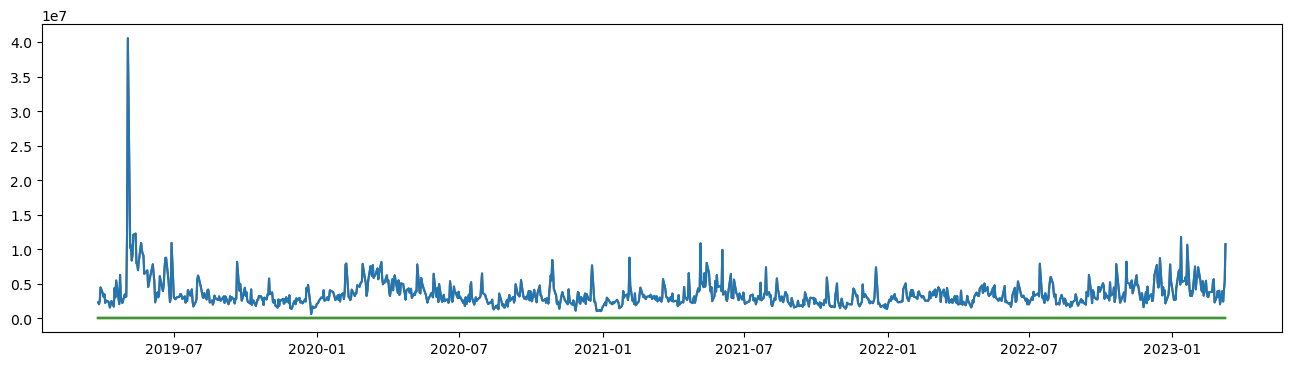

In [28]:
original_data = pd.read_csv(filepath_or_buffer='data/AB0410_prob5_CTSH.csv', index_col='date', parse_dates=True)
original_data.head()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def plot_data_properties(data):
    plt.figure(figsize=(16,4))
    plt.plot(data)
    plt.title(ts_plot_name)

plot_data_properties(original_data);

# NOT COMPLETE

## Handin your final answers by running the code cell below.
- Save your latest changes.
- Please remove anything that may identify you to your anonymous reviewer. See [this Teams message](https://teams.microsoft.com/l/message/19:wpZLQbHG775XujahAR4ScrnPZGiByh6yuWgewJCHXVQ1@thread.tacv2/1675678597453?tenantId=6e9eaaf0-3ff7-4de9-8cd4-1ffbd45951b9&groupId=ba0bbd60-8a1b-42b8-84ff-6de6a3c45ab6&parentMessageId=1675678597453&teamName=Data%20Analytics%20YAMK%2C%20Spring%202023&channelName=General&createdTime=1675678597453&allowXTenantAccess=false).
- You may run the code cell as many times as you wish.
- Your permission to write the handin file ends at the deadline.

In [35]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import handin_exrc_05
handin_exrc_05()


All the relevant .ipynb files in your current directory:

  1. exrc_05-Copy1.ipynb
  2. 5.ipynb



Please input the order number (the one in the beginning of the line) of the file you want to hand in:  1



Your answers to the first exercises were handed in successfully. Thank you!
You may double check your handin by calling

    /home/varpha/data_analytics/bin/handin.sh

from the terminal prompt.
